In [13]:
import numpy as np

In [19]:
#!pip install tensorflow keras pydot matplotlib scipy numpy
!pip install pydot graphviz
#import tensorflow

In [24]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

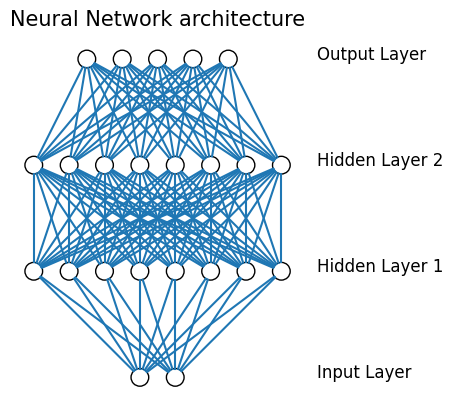

In [29]:
DrawNN( [2,8,8,5] ).draw()

In [16]:
def eig2x2(A):
    a=A[0,0]
    b=A[0,1]
    c=A[1,0]
    d=A[1,1]
    tr = a + d
    det = a*d - b*c
    disc = tr*tr - 4*det
    lam1 = (tr + np.sqrt(disc)) / 2
    lam2 = (tr - np.sqrt(disc)) / 2
    return lam1, lam2

In [17]:
d=np.loadtxt('../data/matrix_03.txt',skiprows=1)
for i, mat2x2 in enumerate(d):
    mat=mat2x2.reshape(2,2)
    print(eig2x2(mat)) ## nan 은 어던 경우인가?

(7.0, -1.0)
(5.60555127546399, -1.6055512754639891)
(1.0, 0.0)
(6.701562118716424, 0.29843788128357573)
(58.13673020344474, -15.136730203444742)
(nan, nan)
(2.0, -1.0)


/var/folders/mj/8q7tbqkj36q7ymb0jmxhvlpw0000gn/T/ipykernel_64756/1596545659.py:9: RuntimeWarning: invalid value encountered in sqrt
  lam1 = (tr + np.sqrt(disc)) / 2
/var/folders/mj/8q7tbqkj36q7ymb0jmxhvlpw0000gn/T/ipykernel_64756/1596545659.py:10: RuntimeWarning: invalid value encountered in sqrt
  lam2 = (tr - np.sqrt(disc)) / 2


## Linear transformation 

In [187]:
import os, subprocess
def gen_gif(dst,rate,fout):
    if fout[-4:]!='.gif':
        print(fout[-4:])
        print('Error: *.gif format is required')
        return None
    default_ffmpeg=os.popen('which ffmpeg').read().split('\n')[0]
    fnout='mine.mp4'
    cmd=[default_ffmpeg,'-y','-r',f'{rate}','-f','image2','-i',
            os.path.join(dst,'%05d.png').replace('\\','/'),
            '-vcodec',
            'libx264', '-crf', '25', '-vf', "pad=ceil(iw/2)*2:ceil(ih/2)*2",
            '-pix_fmt','yuv420p',fnout]

    p=subprocess.Popen(cmd,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    stdo,stde=p.communicate()
    #print(stdo.decode()); print(stde.decode()); # !open {fnout}

    #!ffmpeg -y -i mine.mp4 mine.gif
    cmd=[default_ffmpeg,'-y','-i',fnout,fout]
    p=subprocess.Popen(cmd,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    stdo,stde=p.communicate()
    #print(stdo.decode())
    #print(stde.decode())

## Transforms a scalar to another scalar

$$+, -, \times, /$$

## Transform a vector to another vector 


$$
+,-,\times
$$

$$
\boldsymbol c=\boldsymbol A\cdot\boldsymbol b
$$

In [113]:
def show(A,fmt='%+7.2f'):
    """
    Function to more neatly print out the matrix.
    """
    print('--')
    for i, As in enumerate(A):
        cr=''
        for j, a in enumerate(As):
            cr=f'{cr} {fmt}'%a
        print(cr)


[[0. 0.]
 [0. 0.]]


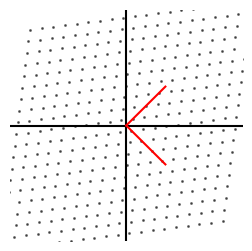

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import tempfile
%matplotlib inline
def map(A,dst=tempfile.mkdtemp(),nres=20,span=10,nsteps=10,**kws):

    #print('***')
    #print('A matrix:')
    #show(A)
    #print('***')

    xs=np.linspace(-span,+span,nres)
    ys=xs.copy()
    x,y=np.meshgrid(xs,ys)

    ## declare figure
    fig=plt.figure(figsize=(3,3))
    ax1=fig.add_subplot(111)
    #rst1=ax1.scatter(x,y,**kws)
    ax1.set_xlim(-span*1.05,+span*1.05)
    ax1.set_ylim(-span*1.05,+span*1.05)
    ax1.set_axis_off()
    ax1.axvline(0,c='k')
    ax1.axhline(0,c='k')

    A0=np.identity(A.shape[0])

    deltaA=A-A0
    #print('progressive changes in A')
    for i in range(nsteps):
        Atilde=A0+deltaA/(nsteps-1)*i
        #show(Atilde)
        xys=np.array((x.flatten(),y.flatten()))
        xys=Atilde@xys
        rst=ax1.scatter(*xys,**kws)

        ## save
        fn=os.path.join(dst,'%5.5i.png'%i)
        fig.savefig(fn,dpi=300)

        ## restore
        if i<nsteps-1: rst.set_visible(False)


    #kws.update(c='r')
    #rst1=ax1.scatter(x,y,**kws)


    from numpy import linalg as LA
    eval, evec=LA.eig(A)


    vecs=np.zeros((2,2,2))
    for i in range(A.shape[0]):
        vecs[i,:,:]=np.array([[0,0],evec[i]]).T
    vecs=vecs*5

    for i in range(A.shape[0]):
        ax1.plot(*vecs[i],'r-')

    #%10 extra figure
    for istep in range(int(nsteps/5)):
        fn=os.path.join(dst,'%5.5i.png'%(istep+nsteps))
        fig.savefig(fn,dpi=300)

    return fig


A=np.zeros((2,2))
dst=tempfile.mkdtemp()
kws=dict(marker='.',alpha=0.5,c='k',s=5)
print(A)
A[1,1]=1
A[0,0]=1
A[0,1]=1.3e-1
A[1,0]=+A[0,1]

fig=map(A,dst=dst,nres=20,span=10,nsteps=20,**kws)

if True:
    !rm rst.gif
    gen_gif(dst,rate=100,fout='rst.gif')
    !open rst.gif

![SegmentLocal](rst.gif)